<h1>Association Rule Mining</h1>

<p>Association Rule Mining is a data mining technique used to discover interesting relationships, patterns, or associations among a set of items in large datasets. It's especially popular in market basket analysis, where it helps identify products that frequently co-occur in transactions.</p>

Association Rule Mining falls under the category of unsupervised learning because it does not rely on predefined labels or correct outputs. Instead, it explores the data to uncover hidden patterns, relationships, or associations among items without any prior knowledge of the outcomes.

<h1>Apriori</h1>

The Apriori Algorithm is a classic association rule mining technique used to extract frequent itemsets and generate association rules from large datasets, typically transactional data.

⚙️ How Apriori Works (Step-by-Step)
<ol>
<li>Set Minimum Support and Confidence Thresholds</li>
These thresholds help decide which itemsets and rules are considered "interesting."

<li>Generate Frequent 1-itemsets (L1):</li>
Count individual items and keep those with support above the threshold.

<li>Generate Candidate k-itemsets (Ck):</li>
Use frequent (k-1)-itemsets to generate candidate k-itemsets.

<li>Prune Candidates:</li>
Remove candidates that have infrequent subsets (using the Apriori principle).

<li>Count Support for Remaining Candidates:</li>
Scan the dataset and calculate support for each.

<li>Repeat:</li>
Repeat steps 3–5 until no more frequent itemsets are found.

<li>Generate Association Rules:</li>
From the frequent itemsets, generate rules that meet the minimum confidence threshold.
</ol>


In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Define the transactions
transactions = [
    ['Milk', 'Egg', 'Bread', 'Butter'],
    ['Milk', 'Butter', 'Egg', 'Ketchup'],
    ['Bread', 'Butter', 'Ketchup'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Cookies'],
    ['Milk', 'Bread', 'Butter', 'Cookies'],
    ['Milk', 'Cookies'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Egg', 'Cookies'],
    ['Milk', 'Butter', 'Bread'],
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread', 'Cookies', 'Ketchup']
]

# Step 2: Encode the transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

df

,Bread,Butter,Cookies,Egg,Ketchup,Milk
0,True,True,False,True,False,True
1,False,True,False,True,True,True
2,True,True,False,False,True,False
3,True,True,False,False,False,True
4,True,True,True,False,False,False
5,True,True,True,False,False,True
6,False,False,True,False,False,True
7,True,True,False,False,False,True
8,True,True,True,True,False,False
9,True,True,False,False,False,True


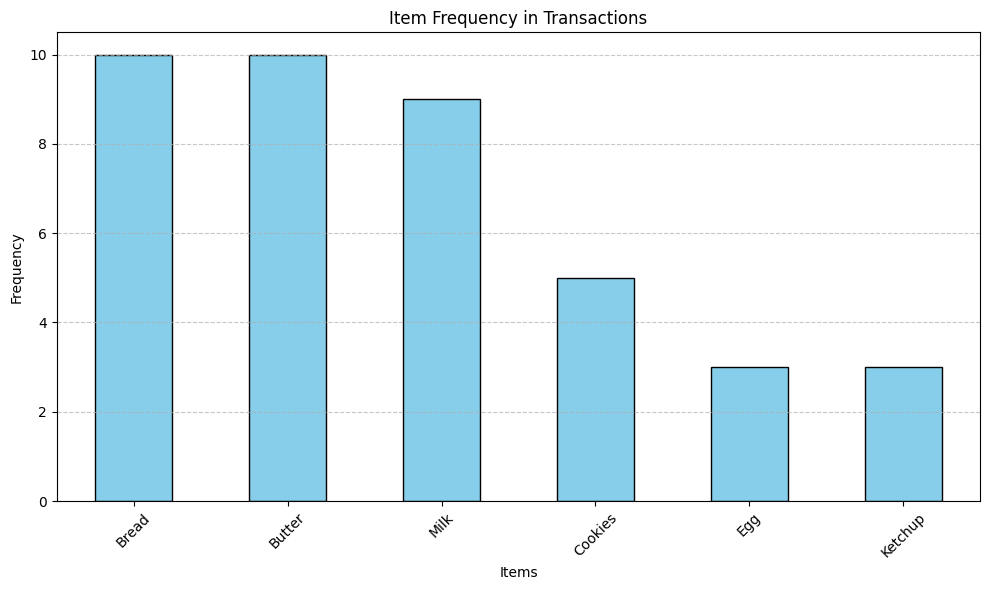

In [3]:
import matplotlib.pyplot as plt

# Step 3: Sum up item appearances (True = 1, False = 0)
item_counts = df.sum().sort_values(ascending=False)

# Step 4: Plotting
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Item Frequency in Transactions')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


From the above bar plot:

Butter appears in nearly all transactions — indicating it's a staple item or a common co-purchase item.

Bread also appears very frequently, suggesting it is commonly bought with other items like Butter and Milk.

Milk is present in a majority of the transactions, showing it is another frequently purchased item.

Cookies, Egg, and Ketchup are more occasional purchases, and may not be in every basket.

In [2]:
# Step 3: Generate frequent itemsets (min_support = 0.33)
frequent_itemsets = apriori(df, min_support=0.33, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.833333,(Bread)
1,0.833333,(Butter)
2,0.416667,(Cookies)
3,0.750000,(Milk)
4,0.750000,"(Butter, Bread)"
5,0.333333,"(Cookies, Bread)"
6,0.583333,"(Bread, Milk)"
7,0.583333,"(Butter, Milk)"
8,0.500000,"(Butter, Bread, Milk)"


In [3]:
# Step 4: Generate association rules (min_confidence = 0.5)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Step 5: Display results
print("📌 Frequent Itemsets (Support ≥ 33%):\n", frequent_itemsets)
print("\n📌 Association Rules (Confidence ≥ 50%):\n", rules[['antecedents', 'consequents', 'support', 'confidence']])

📌 Frequent Itemsets (Support ≥ 33%):
     support               itemsets
0  0.833333                (Bread)
1  0.833333               (Butter)
2  0.416667              (Cookies)
3  0.750000                 (Milk)
4  0.750000        (Butter, Bread)
5  0.333333       (Cookies, Bread)
6  0.583333          (Bread, Milk)
7  0.583333         (Butter, Milk)
8  0.500000  (Butter, Bread, Milk)

📌 Association Rules (Confidence ≥ 50%):
         antecedents      consequents   support  confidence
0          (Butter)          (Bread)  0.750000    0.900000
1           (Bread)         (Butter)  0.750000    0.900000
2         (Cookies)          (Bread)  0.333333    0.800000
3           (Bread)           (Milk)  0.583333    0.700000
4            (Milk)          (Bread)  0.583333    0.777778
5          (Butter)           (Milk)  0.583333    0.700000
6            (Milk)         (Butter)  0.583333    0.777778
7   (Butter, Bread)           (Milk)  0.500000    0.666667
8    (Butter, Milk)          (Bread)  0

By performing Apriori-based association rule mining, we extracted valuable insights into how items are frequently bought together. Frequent Itemsets (min_support = 0.33)
<ul>
<li>Milk & Butter appear together frequently, indicating they are commonly purchased as a pair.</li>
<li>Bread & Butter also have high support, suggesting that consumers prefer them together.</li>
<li>Cookies & Milk show up frequently, reinforcing the idea that they are often consumed together.</li>
</ul>
Association Rules (min_confidence = 0.5) Examples of rules generated:
<ul>
<li>{Milk} → {Butter} (strong confidence): If a customer buys Milk, they are highly likely to buy Butter.</li>
<li>{Bread, Butter} → {Milk}: People who buy Bread & Butter often buy Milk too.</li>
<li>{Cookies} → {Milk}: A strong indicator that Cookies are frequently paired with Milk.</li>
</ul>

<h1>ECLAT (Equivalence Class Clustering and bottom-up Lattice Traversal)</h1>

ECLAT stands for Equivalence Class Transformation. It is an efficient algorithm for frequent itemset mining, often used as an alternative to the Apriori algorithm.

Unlike Apriori, which uses a horizontal database format (lists of items per transaction), ECLAT uses a vertical data format, where each item is associated with the list of transaction IDs (TIDs) in which it appears.

🧠 How ECLAT Works
<ol>
    <li>Convert data to vertical format</li>
    <li>Start with frequent 1-itemsets</li>
    <li>Generate k-itemsets by intersecting TID sets</li>
    <li>Keep itemsets that meet minimum support</li>
    <li>Repeat recursively:Expand itemsets and intersect TID sets until no frequent itemsets remain.</li>
    <li>(Optional) Generate Association Rules)</li>
</ol>

In [5]:
import pandas as pd
from itertools import combinations

In [6]:
# Step 1: Prepare the dataset (from the image)
data = {
    'Bread':   [1,0,0,1,1,0,1,1,1],
    'Butter':  [1,1,1,1,0,1,0,1,1],
    'Milk':    [0,0,1,0,1,1,0,1,1],
    'Coke':    [0,1,0,1,1,1,1,1,0],
    'Jam':     [1,0,0,0,0,0,0,1,0]
}
df = pd.DataFrame(data, index=[f"T{i+1}" for i in range(9)])

# Step 2: Convert to vertical format (item → list of transaction IDs)
vertical_data = {}
for item in df.columns:
    vertical_data[item] = set(df[df[item] == 1].index)

# Step 3: Define minimum support threshold (33% of 9 = 3 transactions)
min_support = 2

# Step 4: Generate frequent itemsets
def eclat(prefix, items, min_support, frequent_itemsets):
    for i in range(len(items)):
        item, tid_set = items[i]
        new_prefix = prefix + [item]
        support = len(tid_set)
        if support >= min_support:
            frequent_itemsets.append((new_prefix, support))
            remaining_items = []
            for j in range(i+1, len(items)):
                item_j, tid_set_j = items[j]
                intersection = tid_set & tid_set_j
                if len(intersection) >= min_support:
                    remaining_items.append((item_j, intersection))
            if remaining_items:
                eclat(new_prefix, remaining_items, min_support, frequent_itemsets)

# Step 5: Run the algorithm
initial_items = list(vertical_data.items())
frequent_itemsets = []
eclat([], initial_items, min_support, frequent_itemsets)

# Step 6: Display results
print("📌 Frequent Itemsets using ECLAT (support ≥ 3):")
for itemset, support in frequent_itemsets:
    print(f"Items: {itemset}, Support: {support}")

📌 Frequent Itemsets using ECLAT (support ≥ 3):
Items: ['Bread'], Support: 6
Items: ['Bread', 'Butter'], Support: 4
Items: ['Bread', 'Butter', 'Milk'], Support: 2
Items: ['Bread', 'Butter', 'Coke'], Support: 2
Items: ['Bread', 'Butter', 'Jam'], Support: 2
Items: ['Bread', 'Milk'], Support: 3
Items: ['Bread', 'Milk', 'Coke'], Support: 2
Items: ['Bread', 'Coke'], Support: 4
Items: ['Bread', 'Jam'], Support: 2
Items: ['Butter'], Support: 7
Items: ['Butter', 'Milk'], Support: 4
Items: ['Butter', 'Milk', 'Coke'], Support: 2
Items: ['Butter', 'Coke'], Support: 4
Items: ['Butter', 'Jam'], Support: 2
Items: ['Milk'], Support: 5
Items: ['Milk', 'Coke'], Support: 3
Items: ['Coke'], Support: 6
Items: ['Jam'], Support: 2
